### How to deal with imbalanced dataset

1. Sampling: Undersample or oversample

    **Undersample**: We do not want to undersample because we will lose data by using this method. One way to address this issue is to use ensemble: break dataset into multiple pieces, each one containing a portion of the majority class and all of the minority class. Then fit multiple models and find a way to "ensemble" the models.

    **Oversample**: Computationally expensive and algorithmically more involved. 
       a. We can use a generative model to create new samples.
       b. Pick existing samples with replacement (SMOTE, ADASYN)
       
    **SMOTE**: Synthetic Minority Oversampling Technique. This technique works by selecting examples that are close in the feature space. 
       a. A random example in the minority group is first chosen, then k of the nearest neighbors for that example are found (usually k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space. 
       b. The combination of SMOTE and under-sampling performs better than plain under-sampling.
    
2. Using hyperparameters to set weights: give more weight to under-represented class. 

    **For XGBoost**: assign weights using "scale_pos_weight" parameter setting.

    **For Logistic Regression and Random Forest**: assign weights using "class_weight" parameter setting

Can also directly use library *imblearn*, which has functions to undersample, oversample, and generate batches for tensorflow and keras, and evaluate imbalanced dataset results. 

### How to evaluate imbalanced classification problem

Commonly people use F1 score to evaluate its performance. 
$$\text{Class 1 precision} = \frac{\text{TP for class 1}}{\text{TP for class 1}+\text{FP for class 1}}$$

$$\text{Class 1 recall} = \frac{\text{TP for class 1}}{\text{TP for class 1}+\text{FN for class 1}}$$

Precision means how confident I am for my prediction in class 1. If I predict the observation to be class 1, how likely it is class 1. Recall means I am able to catch the positive samples. If I predict everything to be in class 2, then I will get a 0 in recall rate. We take the harmonic mean of precision and recall to be F1 score: 

$$\text{F1 Score} = \frac{2\times\text{precision}\times\text{recall}}{\text{precision}+\text{recall}}$$

Useful resources:
1. [Link to Zhihu summary](https://www.zhihu.com/question/372186043/answer/1501948720?utm_source=wechat_session&utm_medium=social&utm_oi=56950054191104&utm_content=group3_Answer&utm_campaign=shareopn)
2. [Link to Youtube Explanation](https://www.youtube.com/watch?v=6M2d2n-QXCc)

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import StandardScaler
import matplotlib

In [133]:
df = pd.read_csv("Fraud_data.csv")
map_ip_address = pd.read_csv("IpAddress_to_Country.csv")
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [134]:
### Transform string date data to date format
df['purchase_time'] = pd.to_datetime(df['purchase_time'])
df['signup_time'] = pd.to_datetime(df['signup_time'])
df.describe(include = 'all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-06-30 03:58:38,2015-07-17 23:22:55,NaN,ZUSVMDEZRBDTX,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:42,2015-01-01 00:00:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-08-18 04:40:29,2015-12-16 02:56:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000


In [135]:
### User id is unique
(df.user_id.duplicated() == False).sum()

151112

### Step 1. Map each ip_address to the corresponding country

In [136]:
df = df.sort_values("ip_address").reset_index(drop = True)
y_row = 0
for i, row in df.iterrows():
    while df.loc[i, "ip_address"] > map_ip_address.loc[y_row, "upper_bound_ip_address"]:
        if y_row < map_ip_address.shape[0]-1:
            y_row += 1
        else:
            df.at[i, "country"] = None
            break
    df.at[i, "country"] = map_ip_address.loc[y_row, "country"]

This is a classification problem. The probability of prediction matters in this problem (i.e. We can design precautions for users with higher predicted risk of commiting fraud and have more surveilance for this group of users). Due to that reason, we can first consider using logistic regression.

### Step 2. Feature Engineering

Since we need to prevent information leak from test data. We need to first perform test-train split before performing feature engineering. We create the following new features:

   1. **interval_signup_purchase**: The interval between signup time and purchase_time
   2. **prop_five_min_purchase**: The proportion of same time window purchase_time within the entire dataset
   3. **prop_five_min_signup**: The proportion of same time window signup_time within the entire dataset
   4. **prop_device_ip_rep**: The proportion of same device id's appearance within the entire dataset
   5. **ratio_countries**: The proportion of each country's appearance within the entire dataset

Process categorical variables:
   4. Create one-hot encodings for *sex, source, and browser* variable
   5. Since there are > 150 countries, we only create one-hot encodings for top 50 countries ranked by appearances. We cluster the rest of the countries to "Other" category and create one-hot encoding for this category. When applying the trained model on test dataset, we need to do the same transformation for the test data, assuming the distribution of countries in the test data is the same as distribution of countries in the train data. 
   6. When there are many unique values in a categorical variable, use likelihood encoding. 
   
Note that *user_id* is unique, so we do not need to use it as a predictor. Also, since *device_id* likely does not carry any information other than the number of repeated device ids within the entire dataset, we do not use is as a predictor.  

In [137]:
### First split the dataset into train and test
seed = 3
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2, random_state = seed)

### Need to reorder index because of the random shuffling
train = train.reset_index(drop = True)
test = test.reset_index(drop = True)

### Use the difference between signup time and purchase time as a feature
train.loc[:, 'interval_signup_purchase'] = train['purchase_time'] - train['signup_time']
train.loc[:, 'interval_signup_purchase'] = pd.to_numeric(train['interval_signup_purchase'])

### If one device is used for multiple times under different user it might be problematic
device_id_rep = train.device_id.value_counts().to_dict()
for i, row in train.iterrows():
    train.at[i, 'prop_device_id_rep'] = device_id_rep[train.loc[i, 'device_id']]/train.shape[0]

In [138]:
### Create sliding window count for signup_time, count the number of registered users within time frame
def create_sliding_window(time_interval, time):
    time = time.sort_values(ascending = True)
    index = time.index.values
    time = time.reset_index(drop = True)
    half_time = time_interval/2
    same_window = pd.DataFrame(np.zeros((time.shape[0], 1)))
    for i in range(time.shape[0]):
        lower_bound = time[i] - datetime.timedelta(0, half_time)
        upper_bound = time[i] + datetime.timedelta(0, half_time)
        lower = i
        upper = i
        while time[lower] > lower_bound and lower > 0:
            lower = lower - 1
        while time[upper] < upper_bound and upper < time.shape[0]-1:
            upper = upper + 1
        if i == 0 or i == time.shape[0]-1:
            same_window.loc[i] = upper - lower - 1
        else:
            same_window.loc[i] = upper - lower - 2
    same_window = same_window.set_index(index)
    return same_window.sort_index()

train['prop_five_min_signup'] = create_sliding_window(300, train.signup_time)
train['prop_five_min_purchase'] = create_sliding_window(300, train.purchase_time)

In [139]:
### Create one-hot encodings for countries. First look at the distribution of ratio in countries
country_rep_dict = train.country.value_counts().to_dict()

for i, row in train.iterrows():
    train.at[i, 'ratio_countries'] = country_rep_dict[train.loc[i, 'country']]/train.shape[0]

(array([40643.,  5843.,  9610., 17426.,     0.,     0.,     0.,     0.,
            0., 47367.]),
 array([8.27205122e-06, 3.91896699e-02, 7.83710677e-02, 1.17552465e-01,
        1.56733863e-01, 1.95915261e-01, 2.35096659e-01, 2.74278057e-01,
        3.13459455e-01, 3.52640852e-01, 3.91822250e-01]),
 <a list of 10 Patch objects>)

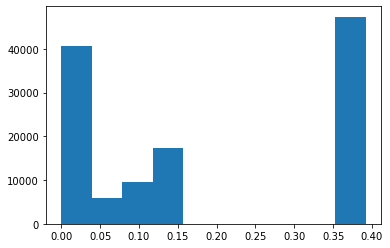

In [140]:
plt.hist(train['ratio_countries'])

In [141]:
### According to the frequencies of countries, we categorize it into k group based on frequencies. 
import math
from sklearn.preprocessing import LabelBinarizer

def categorize_into_k_group(data, k):
    data = data.sort_values(ascending = True) 
    index = data.index.values
    data = data.reset_index(drop = True)
    assignment = pd.DataFrame(np.zeros((data.shape[0], k-1)))
    
    ## Each group should contain total/k observations
    group_size = math.floor(data.shape[0]/k)
    for i in range(k-1):
        if i == 0:
            assignment.iloc[group_size*i:group_size*(i+1), i] = 1
        elif i != 0 and i < k-2:
            assignment.iloc[group_size*i+1:group_size*(i+1), i] = 1
        else:
            assignment.iloc[group_size*i+1:, i] = 1
    assignment = assignment.set_index(index)
    colnames = []
    for i in range(1, k):
        colnames.append(data.name +'_group_' + str(i))
    assignment.columns = colnames
    return assignment.sort_index()

def create_dummy(list_of_vars, data):
    ### Create One-hot encodings for categorical variables
    encoded_df = pd.DataFrame()
    for i in list_of_vars:
        lb = LabelBinarizer()
        lb_results = lb.fit_transform(data[i])
        if lb_results.shape[1] == 1:
            lb_results_df = pd.DataFrame(lb_results, columns=[i])
        else:
            lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
        encoded_df = pd.concat([encoded_df, lb_results_df], axis=1)
    return encoded_df


In [142]:
### Create country one-hot encodings for the top 50 appearances
top_50_countries = train.country.value_counts()[0:50].index.to_list()
for i in range(train.shape[0]):
    if train.loc[i, 'country'] not in top_50_countries:
        train.loc[i, 'country'] = 'Other' 
    
# train = pd.concat([train, categorize_into_k_group(train.ratio_countries, 5)], axis = 1)
train = pd.concat([train, create_dummy(['sex', 'source', "browser", "country"], train)], axis = 1)

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120889 entries, 0 to 120888
Data columns (total 77 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   user_id                          120889 non-null  int64         
 1   signup_time                      120889 non-null  datetime64[ns]
 2   purchase_time                    120889 non-null  datetime64[ns]
 3   purchase_value                   120889 non-null  int64         
 4   device_id                        120889 non-null  object        
 5   source                           120889 non-null  object        
 6   browser                          120889 non-null  object        
 7   sex                              120889 non-null  object        
 8   age                              120889 non-null  int64         
 9   ip_address                       120889 non-null  float64       
 10  class                            120889 non-

### Step 3. Data Exploration and Visualization

In [144]:
train['class'].value_counts()

0    109610
1     11279
Name: class, dtype: int64

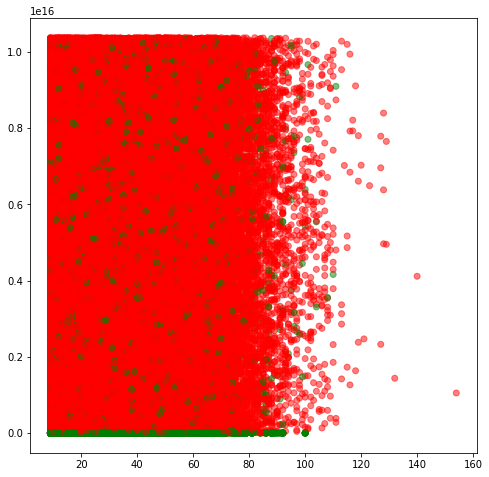

In [145]:
fig = plt.figure(figsize=(8,8))
colors = ['red','green']
plt.scatter(train['purchase_value'], train['interval_signup_purchase'], c=train['class'], alpha = 0.5, cmap=matplotlib.colors.ListedColormap(colors))

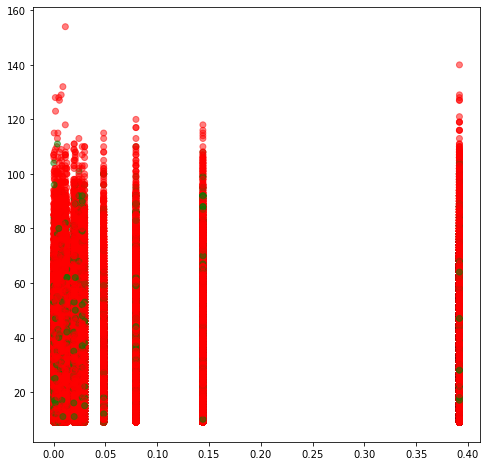

In [146]:
fig = plt.figure(figsize=(8,8))
plt.scatter(train['ratio_countries'], train['purchase_value'], c=train['class'], alpha = 0.5, cmap=matplotlib.colors.ListedColormap(colors))

In [147]:
### Use PCA to visualize the distribution of fraud vs non-fraud
def PCA(X, m):
    cov = np.matmul(np.transpose(X), X)
    eigenvalues, eigenvectors = np.linalg.eig(cov)
    eigenvectors = [x for _, x in sorted(zip(eigenvalues, eigenvectors))[::-1]]
    Z = np.matmul(X, eigenvectors)
    return Z[:, :m]

### Filter out numerical data
train_numerical = train.drop(["user_id", "signup_time", "purchase_time", "device_id", "source", "browser", "sex", "ip_address", "country", "class"], axis = 1)

In [148]:
scaler = StandardScaler()
pca_output = PCA(scaler.fit_transform(train_numerical), 2)

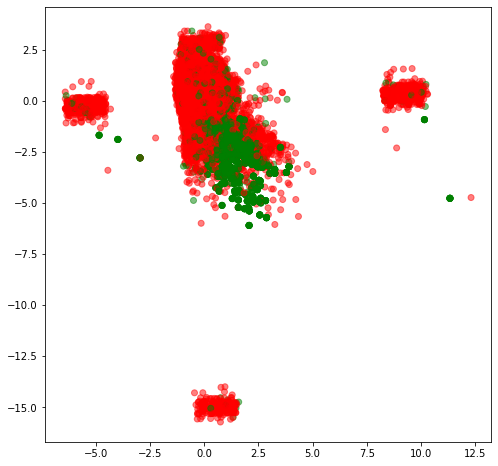

In [149]:
fig = plt.figure(figsize=(8,8))
colors = ['red','green']
plt.scatter(pca_output[:,0], pca_output[:,1], c=train['class'], alpha = 0.5, cmap=matplotlib.colors.ListedColormap(colors))


### Step 4. Perform the Same Feature Engineering for Test Data 

Following the instructions laid out in step 3. We create the following new features:

   1. **interval_signup_purchase**: The interval between signup time and purchase_time
   2. **prop_five_min_purchase**: The proportion of same time window purchase_time within the entire dataset
   3. **prop_five_min_signup**: The proportion of same time window signup_time within the entire dataset
   4. **prop_device_ip_rep**: The proportion of same device id's appearance within the entire dataset
   5. **ratio_countries**: The proportion of each country's appearance within the entire dataset

And corresponding encodings for categorical variables. 


In [150]:
test.loc[:,'interval_signup_purchase'] = pd.to_numeric(test['signup_time']-test['purchase_time'])
test['prop_five_min_signup'] = create_sliding_window(300, test.signup_time)
test['prop_five_min_purchase'] = create_sliding_window(300, test.purchase_time)
device_id_rep = test.device_id.value_counts().to_dict()
for i, row in test.iterrows():
    test.at[i, 'prop_device_id_rep'] = device_id_rep[test.loc[i, 'device_id']]/test.shape[0]
    
country_rep_dict = test.country.value_counts().to_dict()
for i, row in test.iterrows():
    test.at[i, 'ratio_countries'] = country_rep_dict[test.loc[i, 'country']]/test.shape[0]
    
for i in range(test.shape[0]):
    if test.loc[i, 'country'] not in top_50_countries:
        test.loc[i, 'country'] = 'Other' 
test = pd.concat([test, create_dummy(['sex', 'source', "browser", "country"], test)], axis = 1)

In [152]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30223 entries, 0 to 30222
Data columns (total 77 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_id                          30223 non-null  int64         
 1   signup_time                      30223 non-null  datetime64[ns]
 2   purchase_time                    30223 non-null  datetime64[ns]
 3   purchase_value                   30223 non-null  int64         
 4   device_id                        30223 non-null  object        
 5   source                           30223 non-null  object        
 6   browser                          30223 non-null  object        
 7   sex                              30223 non-null  object        
 8   age                              30223 non-null  int64         
 9   ip_address                       30223 non-null  float64       
 10  class                            30223 non-null  int64    

In [153]:
### Drop non-numerical variables for both train and test data
train_numerical = train.drop(["user_id", "signup_time", "purchase_time", "device_id", "source", "browser", "sex", "ip_address", "country"], axis = 1)
test_numerical = test.drop(["user_id", "signup_time", "purchase_time", "device_id", "source", "browser", "sex", "ip_address", "country"], axis = 1)

train_X = train_numerical.drop(['class'], axis = 1)
train_y = train_numerical['class']
test_X = test_numerical.drop(['class'], axis = 1)
test_y = test_numerical['class']


### Step 5. Use Logistic Regression Model

Some considerations regarding normalization in logistic model:
   1. Normalization does not need to be performed for basis logistic regression model. However, performing normalization can help with the convergence speed for optimization. 
   2. Normalization needs to be performed for Lasso/Ridge regression. 
   3. Normalization will lead to change in interpretation: In logistic regression without normalization, your coefficients indicate the effect of a one-unit change in your predictor variable on the log odds of 'success'. The effect of transforming a variable (such as by standardizing or normalizing) is to change what we are calling a 'unit' in the context of our model. After you normalized, your data ranged from 0 to 1. That is, a change of one unit now means going from the lowest valued observation to the highest valued observation.
   4. Note that if you fit the model using normalized training data, then you should also use the mean and variance from the training data to transform the test data. Consider the scaling process as part of the model generated by the training data; Thus the test data is testing both the generality of the model combined with the pre-processing. Often people will scale all the data and then split into train/test data sets. The testing will then validate the model alone, which may be useful if your aim is not to produce a predictive algorithm but to understand the structure of the data (i.e. important variables).

In [155]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

def show_result(y_test, y_predict):
    print(f'Accuracy Score: {metrics.accuracy_score(y_test,y_predict)}')
    print(f'Confusion Matrix: \n{metrics.confusion_matrix(y_test, y_predict)}')
    print(f'Area Under Curve: {metrics.roc_auc_score(y_test, y_predict)}')
    print(f'Precision score: {metrics.precision_score(y_test, y_predict)}')
    print(f'Recall score: {metrics.recall_score(y_test,y_predict)}')

    
### Use normal logistic regression first
scaler = StandardScaler()
logi = linear_model.LogisticRegression(max_iter = 4000000, solver = 'newton-cg')
logi.fit(scaler.fit_transform(train_X), train_y)
show_result(test_y, logi.predict(scaler.transform(test_X)))

Accuracy Score: 0.6816993680309698
Confusion Matrix: 
[[18709  8642]
 [  978  1894]]
Area Under Curve: 0.6717521213189641
Precision score: 0.17976461655277146
Recall score: 0.6594707520891365


In [156]:
### Use the class_weight parameter
w = {0:0.01, 1:0.99}
logi2 = linear_model.LogisticRegression(solver = "sag", class_weight = w)
logi2.fit(scaler.transform(train_X), train_y)
show_result(test_y, logi2.predict(scaler.transform(test_X)))

Accuracy Score: 0.5644376799126493
Confusion Matrix: 
[[14964 12387]
 [  777  2095]]
Area Under Curve: 0.6382833097006021
Precision score: 0.14466233945587625
Recall score: 0.7294568245125348


In [157]:
### Use SMOTE to oversample underrepresented class
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

pipe = make_pipeline(
    SMOTE(),
    linear_model.LogisticRegression())

pipe.fit(scaler.transform(train_X), train_y)
show_result(test_y, pipe.predict(scaler.transform(test_X)))

Accuracy Score: 0.6816993680309698
Confusion Matrix: 
[[18709  8642]
 [  978  1894]]
Area Under Curve: 0.6717521213189641
Precision score: 0.17976461655277146
Recall score: 0.6594707520891365


### Step 6. Use Support Vector Machines

Some considerations in using support vector machines: 
1. We need to perform normalization on the feature space before using SVM. Otherwise, if e.g. dimension 1 is from 0-1000 and dimension 2 is from 0-1.2, then dimension 1 becomes much more important than dimension 2, which will skew results.


[Source](https://neerajkumar.org/writings/svm/)

In [112]:
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [160]:
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter = 300))
clf.fit(train_X, train_y)
show_result(test_y, clf.predict(test_X))

Accuracy Score: 0.6813354068093835
Confusion Matrix: 
[[18698  8653]
 [  978  1894]]
Area Under Curve: 0.6715510317792763
Precision score: 0.1795771309377074
Recall score: 0.6594707520891365


### Step 7. Use XGB model


#### 1. Adaboost

Build a short tree called **Stump** from the training data, then the amount of say that the stump 

#### 2. Gradient Boost [Source](https://www.youtube.com/watch?v=3CC4N4z3GJc)

Starts by making a single leaf instead of a tree or stump, representing an initial guess for the weights of all of the samples. When trying to predict a continuous value like weight, the first guess is the average value. Then gradient boost builds a tree based on the errors made by the previous tree (pseudo-residuals). People tend to restrict the maximum amount of leaves to 8-12. 

In summary, Gradient boost builds fixed sized trees based on previous tree's erros, but unlike AdaBoost, each tree can be larger than a stump. Gradient boost scales all the trees by the same amount, called the learning rate. 

Suppose the Data is $\{(x_i, y_i)\}_{i=1}^n$, our loss function is $L(y_i, f(X))$. The most commonly used loss function is 
$$L(y_i, f(X)) = \frac{1}{2}(observed-predicted)^2$$

**Step 1**: Initialize model with a constant value: 
$$F_0(x) = argmin_\gamma \sum_{i=1}^n L(y_i, \gamma)$$

**Step 2**: for $m=1$ to $M$:

(A) Compute the pseudo residuals for all samples in the dataset: 
$$r_m = -\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}_{F(x) = F_{m-1}(x)}$$

(B) Fit a regression tree to predict the residuals and create terminal regions $R_{jm} \text{for} j = 1,...,J_m$

(C) For $j = 1,...,J_m$ compute 
$$\gamma_{jm} = \text{argmin}_\gamma\sum_{x_i \in R_{ij}}L(y_i, F_{m-1}(x_i)+\gamma)$$

(D) Update 
$$F_m(x) = F_{m-1}(x) + \nu\sum_{j=1}^{J_m} \gamma_{jm} I(x \in R_{jm})$$

In [161]:
!pip install xgboost
import xgboost as xgb
train_matrix = xgb.DMatrix(train_X,train_y)
test_matrix = xgb.DMatrix(test_X)

params = {}
params['silent'] = 1
params['objective'] = 'binary:logistic'  # output probabilities
params['eval_metric'] = 'auc'
params["num_rounds"] = 300
params["early_stopping_rounds"] = 30
params['max_depth'] = 6
params['eta'] = 0.1
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8

cv_results = xgb.cv(params,train_matrix,
                    num_boost_round = params["num_rounds"],
                    nfold = params.get('nfold',5),
                    metrics = params['eval_metric'],
                    early_stopping_rounds = params["early_stopping_rounds"],
                    verbose_eval = True,
                    seed = seed)

[17:33:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds, num_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds, num_rounds, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[17:33:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds, num_rounds, silent } mi

In [162]:
cv_results

,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.828564,0.000961,0.828142,0.004167
1,0.828755,0.001136,0.828186,0.004156
2,0.829378,0.001718,0.828596,0.004001
3,0.830823,0.001145,0.830186,0.005465
4,0.831629,0.001439,0.830113,0.005303
5,0.831727,0.001406,0.830142,0.005294
6,0.832267,0.001846,0.830253,0.005112
7,0.833195,0.001687,0.829690,0.004534
8,0.836592,0.002595,0.829318,0.004714
9,0.837475,0.002043,0.828969,0.004748


In [174]:
### Weighted XGBoost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

weight_ratio = float(len(train_y[train_y == 0]))/float(len(train_y[train_y == 1]))
w_array = np.array([1]*train_y.shape[0])
w_array[train_y==1] = weight_ratio
w_array[train_y==0] = 1- weight_ratio

exgb_classifier = xgb.XGBClassifier(scale_pos_weight=10)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(exgb_classifier, train_X, train_y, scoring='roc_auc', cv=cv, n_jobs=-1)


In [175]:
scores

array([0.82999882, 0.83130547, 0.83537753, 0.81526977, 0.82831142,
       0.83002931, 0.83003121, 0.81440759, 0.8341372 , 0.83278381,
       0.83932916, 0.81999987, 0.83199958, 0.82550404, 0.81983197,
       0.81627115, 0.83216846, 0.8299551 , 0.83615188, 0.8411213 ,
       0.82639731, 0.82357946, 0.82086472, 0.82441725, 0.81632441,
       0.83258265, 0.83808851, 0.82129812, 0.83627263, 0.83037387])